# DATA SCIENCE JOB SALARIES

## Introduction
This analysis provides an in-depth look into the data science job market, highlighting the factors that impact employment in the field.
Whether you’re a seasoned data scientist evaluating your salary or someone considering a career in data science, this analysis offers valuable insights into job trends and compensation.

**Dataset**
The dataset used in this analysis includes anonymized information about data science roles, gathered from sources like surveys, job listings, and public records.
With this data, we can examine salary patterns and variations in data science roles across different time periods and demographic groups. It also supports salary benchmarking, helps assess how factors like experience and company size affect compensation, and informs career choices in data science.

### Questions
This project seeks to answer and explore these questions;
- What are the most common data science roles, and how have they evolved over recent years?
- How does experience level impact salary across different data science roles?
- What impact does company size have on salaries for data science professionals?
- How do geographic location and remote work options influence data science salaries?
- Which specific roles and factors lead to the highest-paying opportunities in data science?

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
warnings.filterwarnings('ignore')

In [5]:
#loading the car_data
df = pd.read_csv('DataScience_salaries_2024.csv') 
df

work_year experience_level employment_type  \
0           2021               MI              FT   
1           2021               MI              FT   
2           2020               MI              FT   
3           2021               MI              FT   
4           2022               SE              FT   
...          ...              ...             ...   
14833       2022               MI              FT   
14834       2020               EX              FT   
14835       2021               EN              FT   
14836       2022               EN              FT   
14837       2020               EN              PT   

                             job_title    salary salary_currency  \
0                       Data Scientist  30400000             CLP   
1                      BI Data Analyst  11000000             HUF   
2                       Data Scientist  11000000             HUF   
3                          ML Engineer   8500000             JPY   
4       Lead Machine Learning Engineer   7500000             INR   
...                                ...       ...             ...   
14833  Business Intelligence Developer     15000             USD   
14834               Staff Data Analyst     15000             USD   
14835       Machine Learning Developer     15000             USD   
14836                     Data Analyst     15000             USD   
14837                      ML Engineer     14000             EUR   

       salary_in_usd employee_residence  remote_ratio company_location  \
0              40038                 CL           100               CL   
1              36259                 HU            50               US   
2              35735                 HU            50               HU   
3              77364                 JP            50               JP   
4              95386                 IN            50               IN   
...              ...                ...           ...              ...   
14833          15000                 GH           100               GH   
14834          15000                 NG             0               CA   
14835          15000                 TH           100               TH   
14836          15000                 ID             0               ID   
14837          15966                 DE           100               DE   

      company_size  
0                L  
1                L  
2                L  
3                S  
4                L  
...            ...  
14833            M  
14834            M  
14835            L  
14836            L  
14837            S  

[14838 rows x 11 columns]

# Data Inspection

In [7]:
# checking the 10 top rows
df.head(10)

work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   
5       2021               MI              FT                     ML Engineer   
6       2021               SE              FT            Data Science Manager   
7       2022               EN              FT                  Data Scientist   
8       2022               EX              FT        Head of Machine Learning   
9       2022               EN              FT               Research Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   
5   7000000             JPY          63711                 JP            50   
6   7000000             INR          94665                 IN            50   
7   6600000             HUF          17684                 HU           100   
8   6000000             INR          76309                 IN            50   
9   5500000             JPY          41809                 JP            50   

  company_location company_size  
0               CL            L  
1               US            L  
2               HU            L  
3               JP            S  
4               IN            L  
5               JP            S  
6               IN            L  
7               HU            M  
8               IN            L  
9               JP            L

In [8]:
# checking the 10 bottom rows
df.tail(10)

work_year experience_level employment_type  \
14828       2024               EN              FT   
14829       2023               MI              FT   
14830       2023               EN              FT   
14831       2022               EN              FT   
14832       2024               EN              PT   
14833       2022               MI              FT   
14834       2020               EX              FT   
14835       2021               EN              FT   
14836       2022               EN              FT   
14837       2020               EN              PT   

                             job_title  salary salary_currency  salary_in_usd  \
14828                    Data Engineer   17598             USD          17598   
14829            Business Data Analyst   17000             USD          17000   
14830                   Data Scientist   16000             USD          16000   
14831                Research Engineer   15662             EUR          16455   
14832                     Data Science   15000             EUR          16666   
14833  Business Intelligence Developer   15000             USD          15000   
14834               Staff Data Analyst   15000             USD          15000   
14835       Machine Learning Developer   15000             USD          15000   
14836                     Data Analyst   15000             USD          15000   
14837                      ML Engineer   14000             EUR          15966   

      employee_residence  remote_ratio company_location company_size  
14828                 MX            50               MX            L  
14829                 AM           100               RU            L  
14830                 EC           100               EC            L  
14831                 RU           100               RU            M  
14832                 DE            50               DE            M  
14833                 GH           100               GH            M  
14834                 NG             0               CA            M  
14835                 TH           100               TH            L  
14836                 ID             0               ID            L  
14837                 DE           100               DE            S

In [9]:
#checking data types 
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
# displaying the data statistics
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  14838.000000  1.483800e+04   14838.000000  14838.000000
mean    2023.138900  1.650227e+05  149874.718763     32.760480
std        0.700799  3.562354e+05   69009.181349     46.488278
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.021000e+05  102000.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.875000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000

In [11]:
# displaying data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


# Data Cleaning

In [13]:
# checking rows and columns
df.shape

(14838, 11)

In [14]:
# checking for duplicates
df[df.duplicated()]

work_year experience_level employment_type                   job_title  \
72          2024               MI              FT  Machine Learning Scientist   
84          2024               MI              FT           Research Engineer   
93          2024               SE              FT   Machine Learning Engineer   
97          2024               SE              FT          Research Scientist   
105         2024               MI              FT           Research Engineer   
...          ...              ...             ...                         ...   
14787       2022               MI              FT               Data Engineer   
14792       2024               EN              FT                Data Analyst   
14793       2024               EN              FT                Data Analyst   
14794       2024               EN              FT                Data Analyst   
14796       2023               EN              FT                Data Analyst   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72     750000             USD         750000                 US             0   
84     720000             USD         720000                 US             0   
93     550000             USD         550000                 US             0   
97     500000             USD         500000                 US           100   
105    440000             USD         440000                 US             0   
...       ...             ...            ...                ...           ...   
14787   24000             USD          24000                 US             0   
14792   23000             GBP          28750                 GB             0   
14793   23000             GBP          28750                 GB             0   
14794   23000             GBP          28750                 GB             0   
14796   23000             GBP          28299                 GB             0   

      company_location company_size  
72                  US            M  
84                  US            M  
93                  US            M  
97                  US            M  
105                 US            M  
...                ...          ...  
14787               US            M  
14792               GB            M  
14793               GB            M  
14794               GB            M  
14796               GB            M  

[5711 rows x 11 columns]

In [15]:
# removing duplicates
# Specify the columns you want to check for duplicates, including 'work_year' and others
columns_to_check = ['work_year', 'experience_level', 'employment_type', 'job_title', 
                    'salary', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Drop duplicates based on the specified columns
df = df.drop_duplicates(subset=columns_to_check, keep='first').reset_index(drop=True)

In [16]:
# checking for null values or missing data
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
#dropping columns
df.drop(columns=['salary','salary_currency'], axis =1, inplace = True)

In [18]:
df

work_year experience_level employment_type  \
0          2021               MI              FT   
1          2021               MI              FT   
2          2020               MI              FT   
3          2021               MI              FT   
4          2022               SE              FT   
...         ...              ...             ...   
9119       2022               MI              FT   
9120       2020               EX              FT   
9121       2021               EN              FT   
9122       2022               EN              FT   
9123       2020               EN              PT   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038                 CL   
1                     BI Data Analyst          36259                 HU   
2                      Data Scientist          35735                 HU   
3                         ML Engineer          77364                 JP   
4      Lead Machine Learning Engineer          95386                 IN   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000                 GH   
9120               Staff Data Analyst          15000                 NG   
9121       Machine Learning Developer          15000                 TH   
9122                     Data Analyst          15000                 ID   
9123                      ML Engineer          15966                 DE   

      remote_ratio company_location company_size  
0              100               CL            L  
1               50               US            L  
2               50               HU            L  
3               50               JP            S  
4               50               IN            L  
...            ...              ...          ...  
9119           100               GH            M  
9120             0               CA            M  
9121           100               TH            L  
9122             0               ID            L  
9123           100               DE            S  

[9124 rows x 9 columns]

In [19]:
# converting the company location codes and employee residence to full name
!pip install pycountry
import pycountry

# Function to convert country code to full name
def convert_country_code(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code  # Return the code as is if it can't be converted

# Apply the function to the columns
df['company_location'] = df['company_location'].apply(convert_country_code)
df['employee_residence'] = df['employee_residence'].apply(convert_country_code)

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB 495.5 kB/s eta 0:00:13
    --------------------------------------- 0.1/6.3 MB 901.1 kB/s eta 0:00:07
   - -------------------------------------- 0.2/6.3 MB 1.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.3/6.3 MB 1.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/6.3 MB 1.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/6.3 MB 1.8 MB/s eta 0:00:04
   ---- ----------------------------------- 0.6/6.3 MB 1.8 MB/s eta 0:00:04
   ---- ----------------------------------- 0.7/6.3 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 0.8/6.3 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 0.9/6.3 MB 1.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.0/6.3 MB 1.8 MB/s eta 0:00:03
   ------ ------------

In [20]:
# Display the first few rows to confirm the changes
print(df[['company_location', 'employee_residence']].head())

  company_location employee_residence
0            Chile              Chile
1    United States            Hungary
2          Hungary            Hungary
3            Japan              Japan
4            India              India


In [21]:
# Display a larger sample of rows to verify changes
print(df[['company_location', 'employee_residence']].sample(10))

     company_location employee_residence
3715    United States      United States
2971    United States      United States
67             Norway             Norway
3081    United States      United States
5193    United States      United States
1835    United States      United States
2447    United States      United States
2617    United States      United States
3568    United States      United States
530     United States      United States


In [22]:
# Converting experience levels into more descriptive names that replaces them on the original column.
# Mapping experience levels to more descriptive labels.
def map_experience_level(df, original_column='experience_level', new_column='experience_level'):

    # Define the mapping dictionary
    experience_level_mapping = {
        'EN': 'Entry-Level',
        'MI': 'Mid-Level',
        'SE': 'Senior-Level',
        'EX': 'Expert-Level'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(experience_level_mapping)
    return df

df = map_experience_level(df)

In [23]:
df

work_year experience_level employment_type  \
0          2021        Mid-Level              FT   
1          2021        Mid-Level              FT   
2          2020        Mid-Level              FT   
3          2021        Mid-Level              FT   
4          2022     Senior-Level              FT   
...         ...              ...             ...   
9119       2022        Mid-Level              FT   
9120       2020     Expert-Level              FT   
9121       2021      Entry-Level              FT   
9122       2022      Entry-Level              FT   
9123       2020      Entry-Level              PT   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038              Chile   
1                     BI Data Analyst          36259            Hungary   
2                      Data Scientist          35735            Hungary   
3                         ML Engineer          77364              Japan   
4      Lead Machine Learning Engineer          95386              India   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000              Ghana   
9120               Staff Data Analyst          15000            Nigeria   
9121       Machine Learning Developer          15000           Thailand   
9122                     Data Analyst          15000          Indonesia   
9123                      ML Engineer          15966            Germany   

      remote_ratio company_location company_size  
0              100            Chile            L  
1               50    United States            L  
2               50          Hungary            L  
3               50            Japan            S  
4               50            India            L  
...            ...              ...          ...  
9119           100            Ghana            M  
9120             0           Canada            M  
9121           100         Thailand            L  
9122             0        Indonesia            L  
9123           100          Germany            S  

[9124 rows x 9 columns]

In [24]:
# Converting employment type into more descriptive names and replaces them on the original column.
# Mapping employment type to more descriptive labels.
def map_employment_type(df, original_column='employment_type', new_column='employment_type'):

    # Define the mapping dictionary
    employment_type_mapping = {
        'FT': 'Full-Time',
        'FL': 'Freelance',
        'CT': 'Contract',
        'PT': 'Part-Time'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(employment_type_mapping)
    return df

df = map_employment_type(df)

In [25]:
df

work_year experience_level employment_type  \
0          2021        Mid-Level       Full-Time   
1          2021        Mid-Level       Full-Time   
2          2020        Mid-Level       Full-Time   
3          2021        Mid-Level       Full-Time   
4          2022     Senior-Level       Full-Time   
...         ...              ...             ...   
9119       2022        Mid-Level       Full-Time   
9120       2020     Expert-Level       Full-Time   
9121       2021      Entry-Level       Full-Time   
9122       2022      Entry-Level       Full-Time   
9123       2020      Entry-Level       Part-Time   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038              Chile   
1                     BI Data Analyst          36259            Hungary   
2                      Data Scientist          35735            Hungary   
3                         ML Engineer          77364              Japan   
4      Lead Machine Learning Engineer          95386              India   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000              Ghana   
9120               Staff Data Analyst          15000            Nigeria   
9121       Machine Learning Developer          15000           Thailand   
9122                     Data Analyst          15000          Indonesia   
9123                      ML Engineer          15966            Germany   

      remote_ratio company_location company_size  
0              100            Chile            L  
1               50    United States            L  
2               50          Hungary            L  
3               50            Japan            S  
4               50            India            L  
...            ...              ...          ...  
9119           100            Ghana            M  
9120             0           Canada            M  
9121           100         Thailand            L  
9122             0        Indonesia            L  
9123           100          Germany            S  

[9124 rows x 9 columns]

In [26]:
# Converting company size into more descriptive names and replaces them on the original column.
# Mapping company size to more descriptive labels.
def map_remote_ratio(df, original_column='remote_ratio', new_column='remote_ratio'):

    # Define the mapping dictionary
    remote_ratio_mapping = {
        0: 'In-Person',
        50: 'Hybrid',
        100: 'Remote'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(remote_ratio_mapping)
    return df

df = map_remote_ratio(df)

In [27]:
df

work_year experience_level employment_type  \
0          2021        Mid-Level       Full-Time   
1          2021        Mid-Level       Full-Time   
2          2020        Mid-Level       Full-Time   
3          2021        Mid-Level       Full-Time   
4          2022     Senior-Level       Full-Time   
...         ...              ...             ...   
9119       2022        Mid-Level       Full-Time   
9120       2020     Expert-Level       Full-Time   
9121       2021      Entry-Level       Full-Time   
9122       2022      Entry-Level       Full-Time   
9123       2020      Entry-Level       Part-Time   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038              Chile   
1                     BI Data Analyst          36259            Hungary   
2                      Data Scientist          35735            Hungary   
3                         ML Engineer          77364              Japan   
4      Lead Machine Learning Engineer          95386              India   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000              Ghana   
9120               Staff Data Analyst          15000            Nigeria   
9121       Machine Learning Developer          15000           Thailand   
9122                     Data Analyst          15000          Indonesia   
9123                      ML Engineer          15966            Germany   

     remote_ratio company_location company_size  
0          Remote            Chile            L  
1          Hybrid    United States            L  
2          Hybrid          Hungary            L  
3          Hybrid            Japan            S  
4          Hybrid            India            L  
...           ...              ...          ...  
9119       Remote            Ghana            M  
9120    In-Person           Canada            M  
9121       Remote         Thailand            L  
9122    In-Person        Indonesia            L  
9123       Remote          Germany            S  

[9124 rows x 9 columns]

In [28]:
# Converting company size into more descriptive names and replaces them on the original column.
# Mapping company size to more descriptive labels.
def map_company_size(df, original_column='company_size', new_column='company_size'):

    # Define the mapping dictionary
    company_size_mapping = {
        'L': 'Large',
        'M': 'Medium',
        'S': 'Small'
    }

    # Create the new column
    df[new_column] = df[original_column].replace(company_size_mapping)
    return df

df = map_company_size(df)

In [29]:
df

work_year experience_level employment_type  \
0          2021        Mid-Level       Full-Time   
1          2021        Mid-Level       Full-Time   
2          2020        Mid-Level       Full-Time   
3          2021        Mid-Level       Full-Time   
4          2022     Senior-Level       Full-Time   
...         ...              ...             ...   
9119       2022        Mid-Level       Full-Time   
9120       2020     Expert-Level       Full-Time   
9121       2021      Entry-Level       Full-Time   
9122       2022      Entry-Level       Full-Time   
9123       2020      Entry-Level       Part-Time   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038              Chile   
1                     BI Data Analyst          36259            Hungary   
2                      Data Scientist          35735            Hungary   
3                         ML Engineer          77364              Japan   
4      Lead Machine Learning Engineer          95386              India   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000              Ghana   
9120               Staff Data Analyst          15000            Nigeria   
9121       Machine Learning Developer          15000           Thailand   
9122                     Data Analyst          15000          Indonesia   
9123                      ML Engineer          15966            Germany   

     remote_ratio company_location company_size  
0          Remote            Chile        Large  
1          Hybrid    United States        Large  
2          Hybrid          Hungary        Large  
3          Hybrid            Japan        Small  
4          Hybrid            India        Large  
...           ...              ...          ...  
9119       Remote            Ghana       Medium  
9120    In-Person           Canada       Medium  
9121       Remote         Thailand        Large  
9122    In-Person        Indonesia        Large  
9123       Remote          Germany        Small  

[9124 rows x 9 columns]

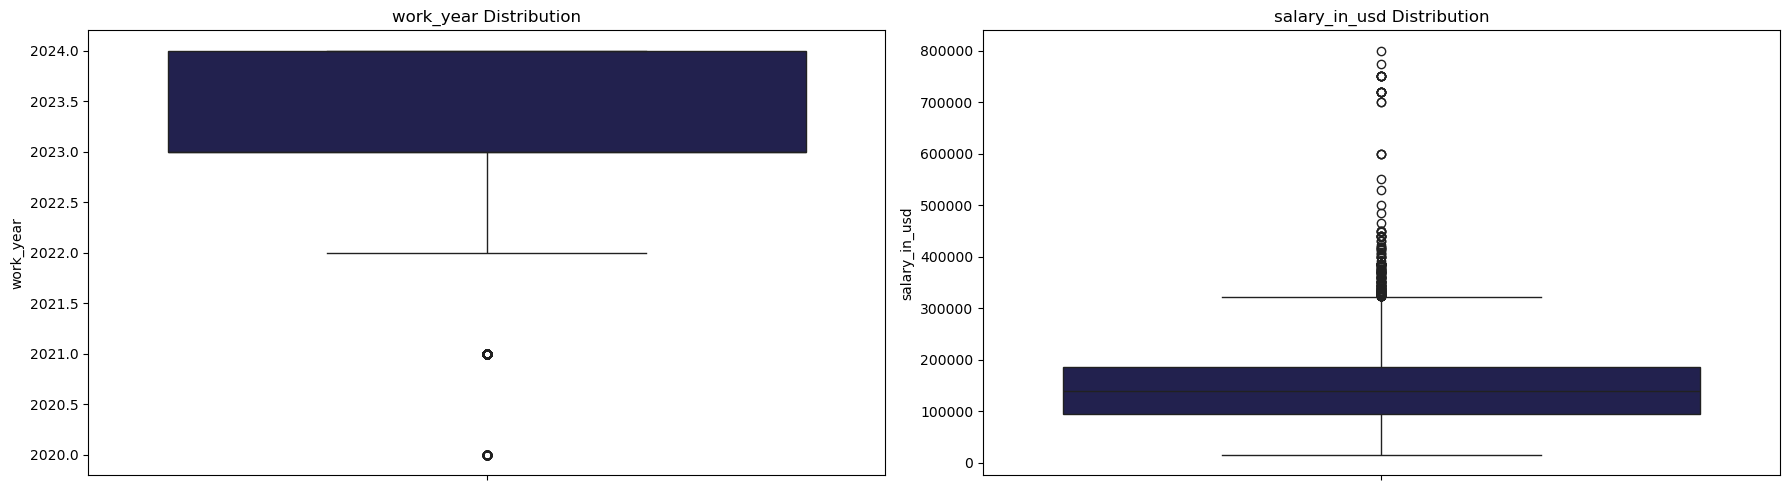

In [30]:
## checking for outliers with the boxplot
# Set up the figure
plt.figure(figsize=(18, 5))

# Define the numerical columns you want to check distribution for
cd= df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for i, column in enumerate(cd, 1):
    plt.subplot(1, len(cd), i)  # Arrange boxplots horizontally
    sns.boxplot(data=df, y=column, color='#1B1A55')
    plt.title(f'{column} Distribution')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [31]:
# Find unique job titles
unique_job_titles = df['job_title'].unique()

# Display the unique job titles
print(unique_job_titles)

['Data Scientist' 'BI Data Analyst' 'ML Engineer'
 'Lead Machine Learning Engineer' 'Data Science Manager'
 'Head of Machine Learning' 'Research Engineer' 'Head of Data Science'
 'AI Programmer' 'Machine Learning Engineer' 'Lead Data Scientist'
 'Data Engineer' 'Applied Machine Learning Scientist' 'Lead Data Analyst'
 'Data Analytics Manager' 'Data Integration Specialist'
 'Principal Data Architect' 'NLP Engineer' 'Big Data Engineer'
 'AI Research Engineer' 'Machine Learning Software Engineer'
 'Data Analyst' 'Applied Data Scientist' 'AI Scientist'
 'Data Analytics Lead' 'Business Data Analyst' 'Product Data Analyst'
 'Computer Vision Engineer' 'Data Science Consultant' 'AI Architect'
 'Analytics Engineer' 'Machine Learning Scientist' 'Research Scientist'
 'Prompt Engineer' 'Principal Data Scientist' 'Applied Scientist'
 'Deep Learning Engineer' 'Data Architect' 'AI Engineer'
 'Data Infrastructure Engineer' 'Data Science' 'Director of Data Science'
 'Data Science Tech Lead' 'BI Analyst

In [32]:
# Define a function to classify job titles into specific categories
def classify_job_title(title):
    title = title.lower()  # Convert to lowercase for case-insensitive matching
    
    # Data Science
    if any(keyword in title for keyword in ["data scientist", "data science", "data science lead", "data practitioner", "analytics lead", "data science manager", "director of data science"]):
        return "Data Science"
    
    # Data Engineering
    elif any(keyword in title for keyword in ["data engineer", "data architect", "etl", "infrastructure engineer", "pipeline", "integration", "cloud engineer", "big data", "data devops", "data operations"]):
        return "Data Eng."
    
    # Machine Learning/AI
    elif any(keyword in title for keyword in ["machine learning", "ml", "ai", "artificial intelligence", "deep learning", "nlp", "vision engineer", "mlops", "computer vision", "autonomous vehicle", "ml scientist", "prompt engineer"]):
        return "ML & AI"
    
    # Business Intelligence (BI) & Analytics
    elif any(keyword in title for keyword in ["business intelligence", "bi", "analytics", "insight", "crm", "visualization", "power bi", "marketing analyst", "decision scientist", "bi developer", "bi analyst"]):
        return "Business Intelligence"
    
    # Data Analyst
    elif any(keyword in title for keyword in ["data analyst", "reporting analyst", "data analytics", "data specialist", "analytics consultant", "data operations analyst", "quantitative analyst", "staff data analyst", "senior data analyst"]):
        return "Data Analyst"
    
    # Product & Strategy
    elif any(keyword in title for keyword in ["product manager", "data product owner", "data product", "data strategy", "strategy manager", "data strategist"]):
        return "Product & Strategy"
    
    # Data Management & Quality
    elif any(keyword in title for keyword in ["data management", "data quality", "data governance", "data steward", "data operations manager", "data compliance"]):
        return "Data Management & Quality"
    
    # Research & Applied Science
    elif any(keyword in title for keyword in ["research scientist", "applied scientist", "computational", "data science researcher", "biologist", "research engineer"]):
        return "Research & Applied Science"
    
    # Leadership & Executive
    elif any(keyword in title for keyword in ["lead", "head", "director", "principal", "chief", "manager", "managing director", "executive"]):
        return "Leadership & Executive"
    
    # Other
    else:
        return "Other"

# Apply the classification to the job_title column
df['job_category'] = df['job_title'].apply(classify_job_title)

# Display the unique categories and a sample of job titles in each
print(df['job_category'].unique())
print(df[['job_title', 'job_category']].sample(10))

['Data Science' 'Business Intelligence' 'ML & AI'
 'Research & Applied Science' 'Data Eng.' 'Data Analyst'
 'Leadership & Executive' 'Product & Strategy' 'Other'
 'Data Management & Quality']
                     job_title  job_category
8474  Computer Vision Engineer       ML & AI
2692             Data Engineer     Data Eng.
7088         Robotics Engineer         Other
7160            Data Scientist  Data Science
243               AI Architect       ML & AI
2471               ML Engineer       ML & AI
6651             AI Programmer       ML & AI
11               AI Programmer       ML & AI
194              Data Engineer     Data Eng.
8701          Research Analyst         Other


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9124 non-null   int64 
 1   experience_level    9124 non-null   object
 2   employment_type     9124 non-null   object
 3   job_title           9124 non-null   object
 4   salary_in_usd       9124 non-null   int64 
 5   employee_residence  9124 non-null   object
 6   remote_ratio        9124 non-null   object
 7   company_location    9124 non-null   object
 8   company_size        9124 non-null   object
 9   job_category        9124 non-null   object
dtypes: int64(2), object(8)
memory usage: 712.9+ KB


In [34]:
data_science = df

In [35]:
data_science

work_year experience_level employment_type  \
0          2021        Mid-Level       Full-Time   
1          2021        Mid-Level       Full-Time   
2          2020        Mid-Level       Full-Time   
3          2021        Mid-Level       Full-Time   
4          2022     Senior-Level       Full-Time   
...         ...              ...             ...   
9119       2022        Mid-Level       Full-Time   
9120       2020     Expert-Level       Full-Time   
9121       2021      Entry-Level       Full-Time   
9122       2022      Entry-Level       Full-Time   
9123       2020      Entry-Level       Part-Time   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038              Chile   
1                     BI Data Analyst          36259            Hungary   
2                      Data Scientist          35735            Hungary   
3                         ML Engineer          77364              Japan   
4      Lead Machine Learning Engineer          95386              India   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000              Ghana   
9120               Staff Data Analyst          15000            Nigeria   
9121       Machine Learning Developer          15000           Thailand   
9122                     Data Analyst          15000          Indonesia   
9123                      ML Engineer          15966            Germany   

     remote_ratio company_location company_size           job_category  
0          Remote            Chile        Large           Data Science  
1          Hybrid    United States        Large  Business Intelligence  
2          Hybrid          Hungary        Large           Data Science  
3          Hybrid            Japan        Small                ML & AI  
4          Hybrid            India        Large                ML & AI  
...           ...              ...          ...                    ...  
9119       Remote            Ghana       Medium  Business Intelligence  
9120    In-Person           Canada       Medium           Data Analyst  
9121       Remote         Thailand        Large                ML & AI  
9122    In-Person        Indonesia        Large           Data Analyst  
9123       Remote          Germany        Small                ML & AI  

[9124 rows x 10 columns]

# DATA VISUALIZATION

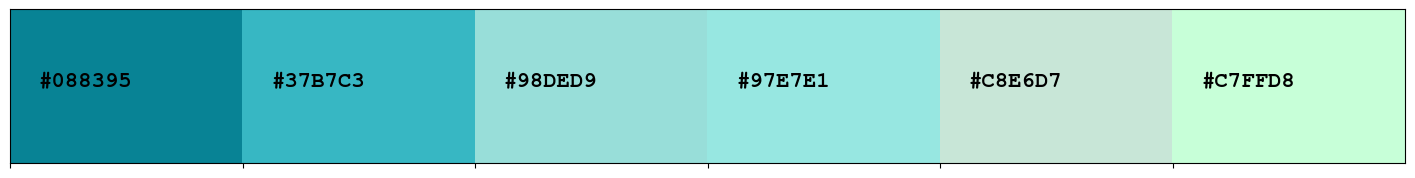

In [232]:
# creating a custom palette for my data
colorss = ['#088395','#37B7C3','#98DED9','#97E7E1','#C8E6D7','#C7FFD8'] '#071952','#0145AC', '#3DBDEB','#B7E6F7',

sns.palplot(colorss)
plt.gcf().set_size_inches(18,2)

for idx,values in enumerate(colorss):
    plt.text(idx-0.375,0, colorss[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha = 1.0)
plt.gcf().set_facecolor('white')

plt.show()

## Checking the various Distributions in the data

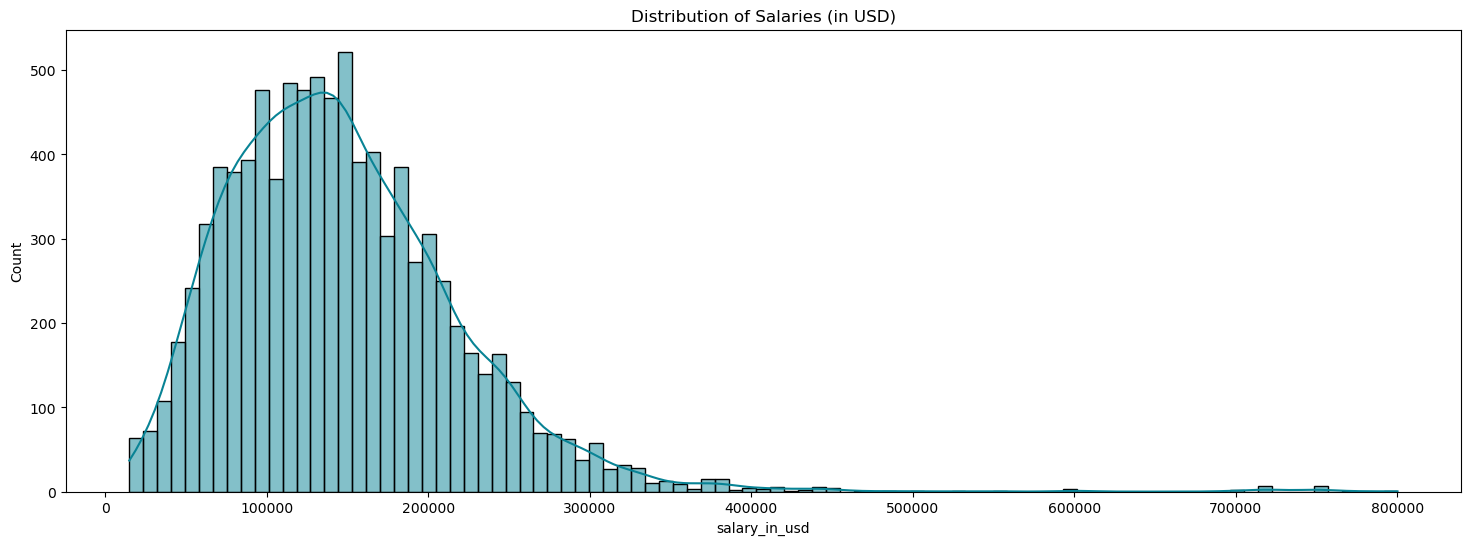

In [336]:
# Salary Distribution
plt.figure(figsize=(18, 6))
sns.histplot(data_science['salary_in_usd'], kde=True, color='#088395')
plt.title("Distribution of Salaries (in USD)")
# Save the plot before showing
plt.savefig("1.jpeg", format='jpeg')
plt.show()

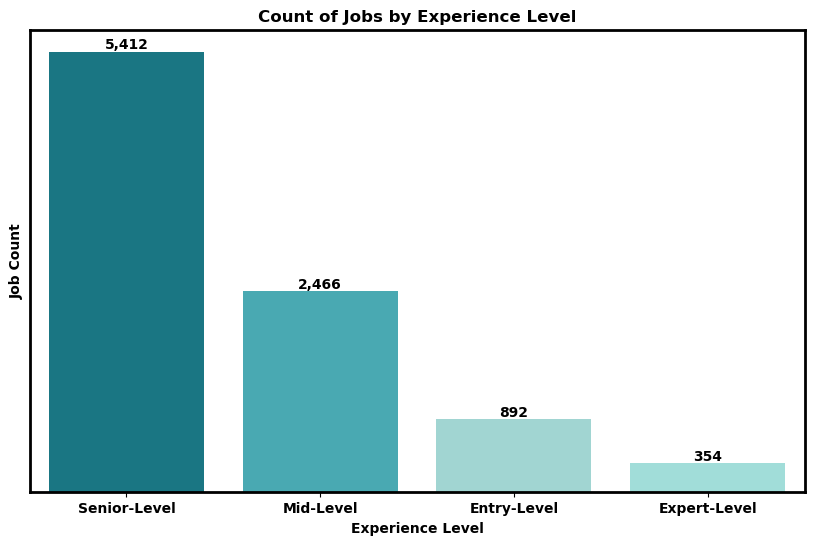

In [292]:
# Sort 'experience_level' by count in descending order
order = data_science['experience_level'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_science, x='experience_level', order=order, palette=colorss)
plt.xlabel('Experience Level', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Experience Level', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks([])

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')
    
# Save the plot before showing
plt.savefig("exp.jpeg", format='jpeg')
plt.show()

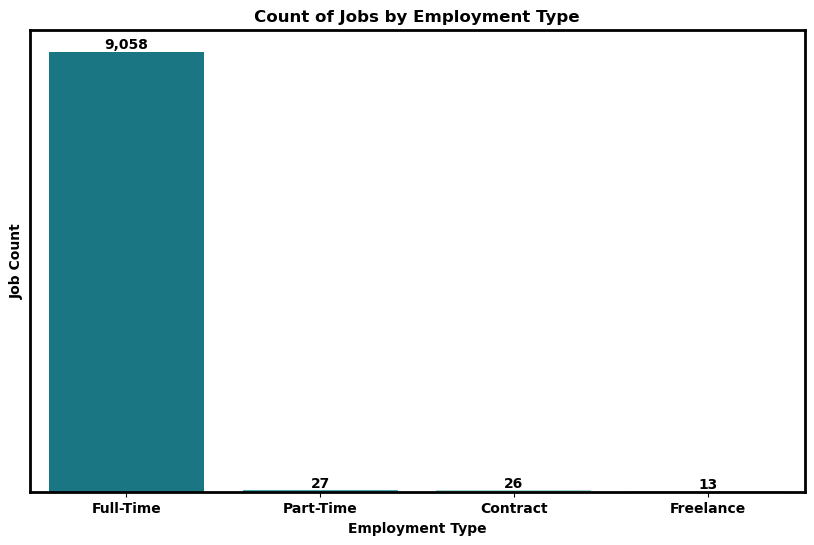

In [290]:
order = data_science['employment_type'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_science, x='employment_type', order=order, palette=colorss)
plt.xlabel('Employment Type', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Employment Type', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks([])

# Customize spines
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Annotate bar values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

# Save the plot before showing
plt.savefig("employment_type_count.jpeg", format='jpeg')

# Display the plot
plt.show()


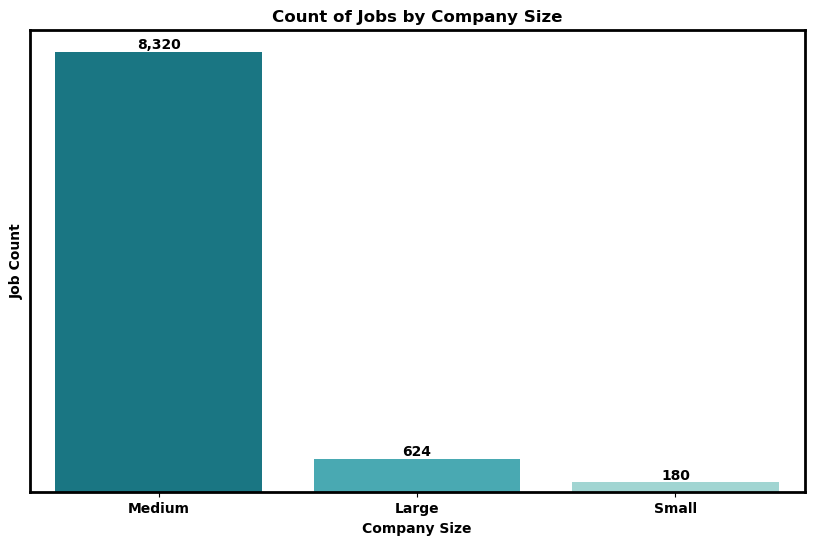

In [296]:
order = data_science['company_size'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_science, x='company_size',order=order,palette=colorss)
plt.xlabel('Company Size', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Company Size', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks([])

for spine in ax.spines.values():
    spine.set_linewidth(2)


for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

# Save the plot before showing
plt.savefig("4.jpeg", format='jpeg')
plt.show()

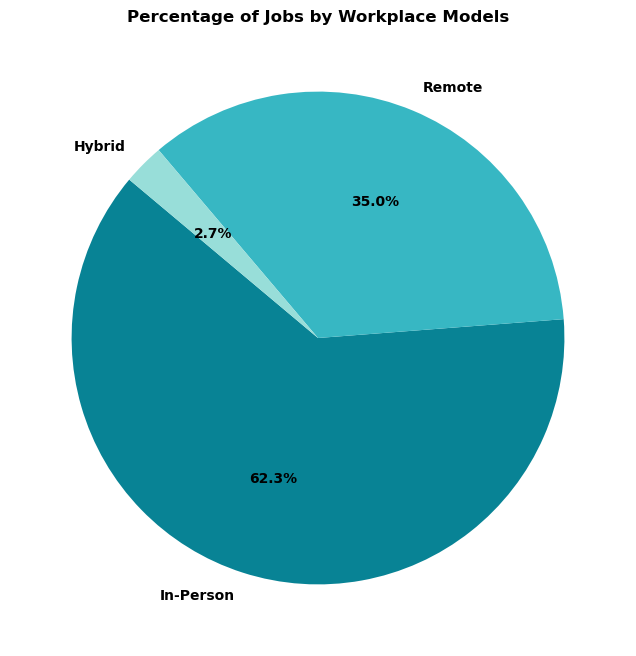

In [298]:
# Calculate the counts for each remote ratio category
remote_ratio_counts = data_science['remote_ratio'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=colorss, textprops={'fontweight': 'bold'})

# Set the title
plt.title('Percentage of Jobs by Workplace Models', fontweight='bold')

# Save the plot before showing
plt.savefig("5.jpeg", format='jpeg')
# Display the chart
plt.show()

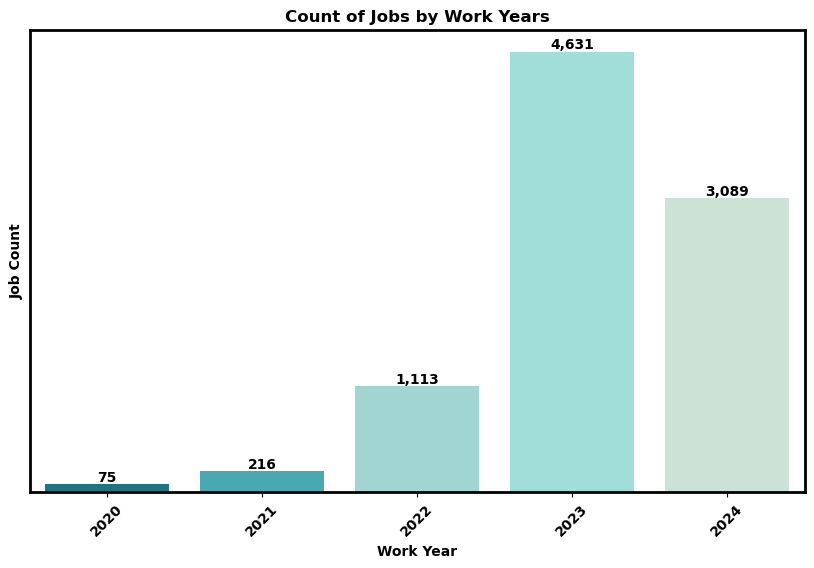

In [302]:
order = data_science['work_year'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='work_year',palette=colorss)
plt.xlabel('Work Year', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Work Years', fontweight='bold') # Başlığı burada güncelledik
plt.xticks(rotation=45, fontweight='bold')
plt.yticks([])

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

# Save the plot before showing
plt.savefig("6.jpeg", format='jpeg')
plt.show()

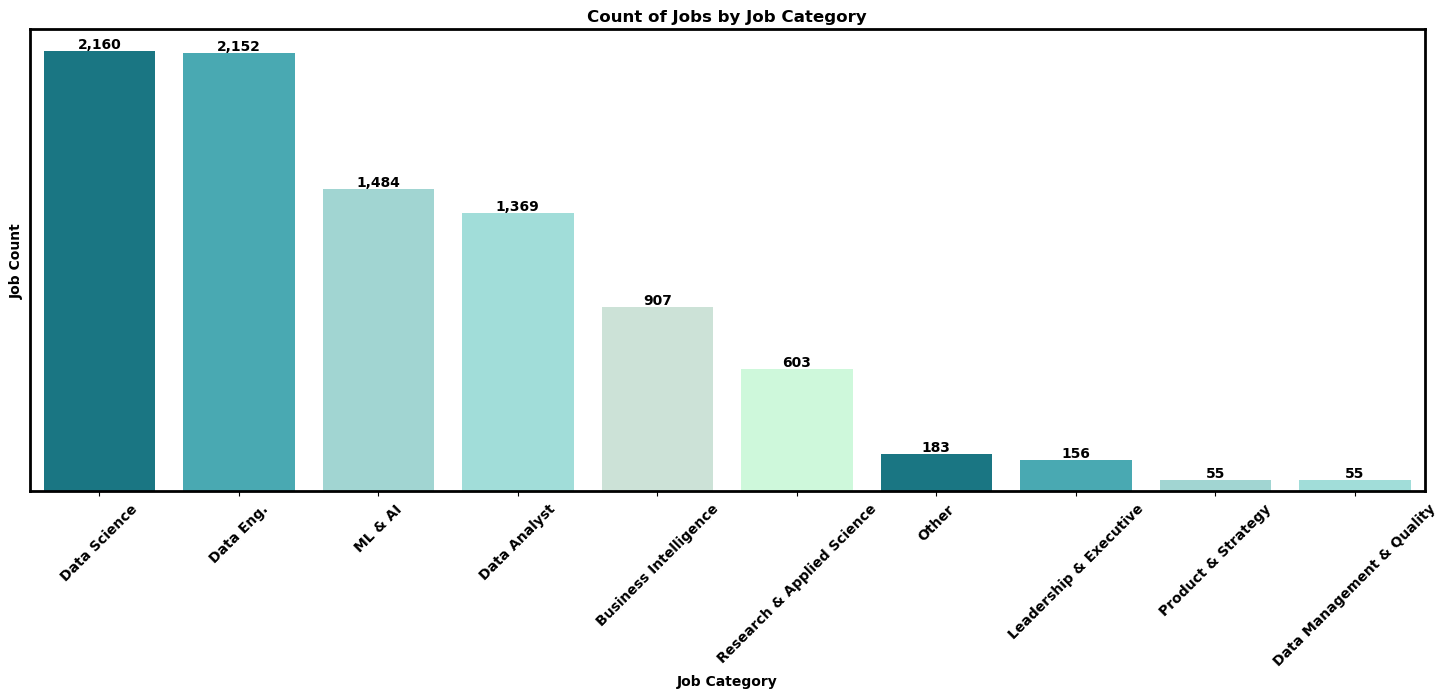

In [304]:
order = data_science['job_category'].value_counts().index

plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x='job_category',order=order,palette=colorss)
plt.xlabel('Job Category', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Count of Jobs by Job Category', fontweight='bold') 
plt.xticks(rotation=45, fontweight='bold')
plt.yticks([])

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

# Save the plot before showing
plt.savefig("7.jpeg", format='jpeg')
plt.show()

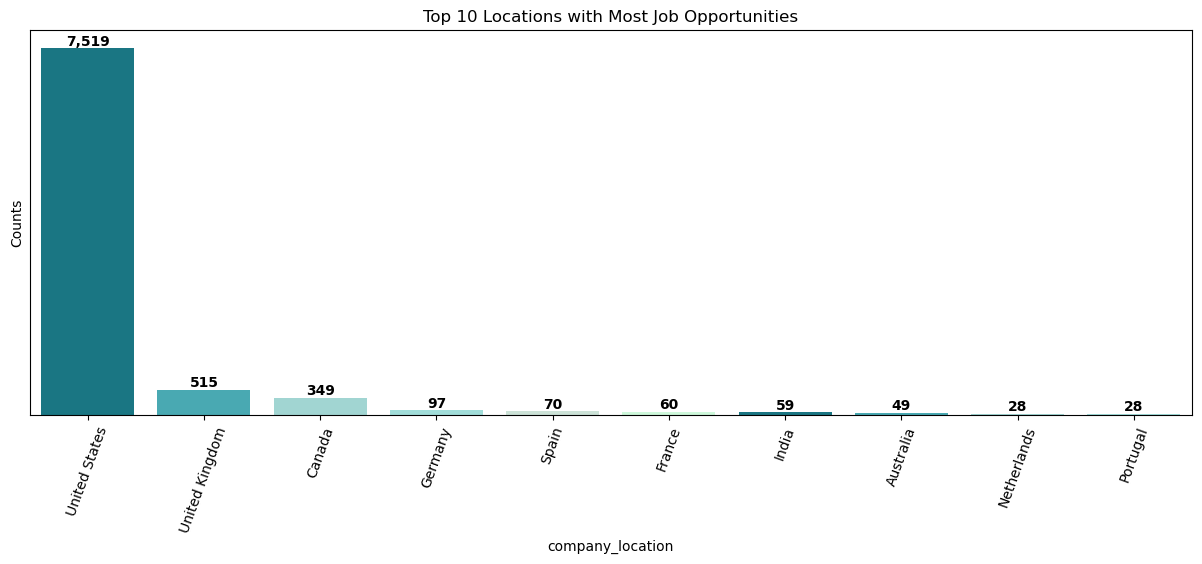

In [306]:
top_10_locations = df['company_location'].value_counts().head(10).index

fig, ax = plt.subplots(facecolor="white", figsize=(15, 5))
sns.countplot(ax=ax, data=df, x='company_location', order=top_10_locations,palette=colorss)
ax.set(ylabel='Counts', title='Top 10 Locations with Most Job Opportunities')
ax.set_facecolor("xkcd:white")

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.xticks(rotation=70)
plt.yticks([])

# Save the plot before showing
plt.savefig("8.jpeg", format='jpeg')
plt.show()

# Exploring the questions

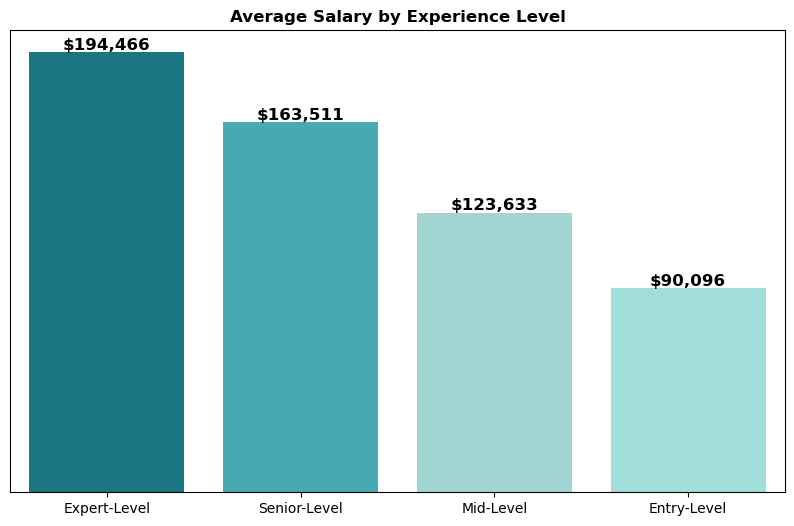

In [308]:
# Q1 -- What is the average salary for data science roles across different experience levels?

# Calculate average salary by experience level
salary_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Sort the values in descending order
salary_experience = salary_experience.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(10,6))
ax = sns.barplot(x='experience_level', y='salary_in_usd', data=salary_experience, palette=colorss)
ax.get_yaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Experience Level', fontweight='bold')
plt.xlabel('')
plt.ylabel('')
# Save the plot before showing
plt.savefig("9.jpeg", format='jpeg')
plt.show()

In [310]:
# Q2 -- What is the average salary for data science roles across different company sizes?
# Calculate average salary by company size
salary_company_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Sort the values in descending order
salary_company_size = salary_company_size.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(10,6))
ax = sns.barplot(x='company_size', y='salary_in_usd', data=salary_company_size, palette=colorss)
ax.get_yaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('')
# Save the plot before showing
plt.savefig("10.jpeg", format='jpeg')
plt.show()

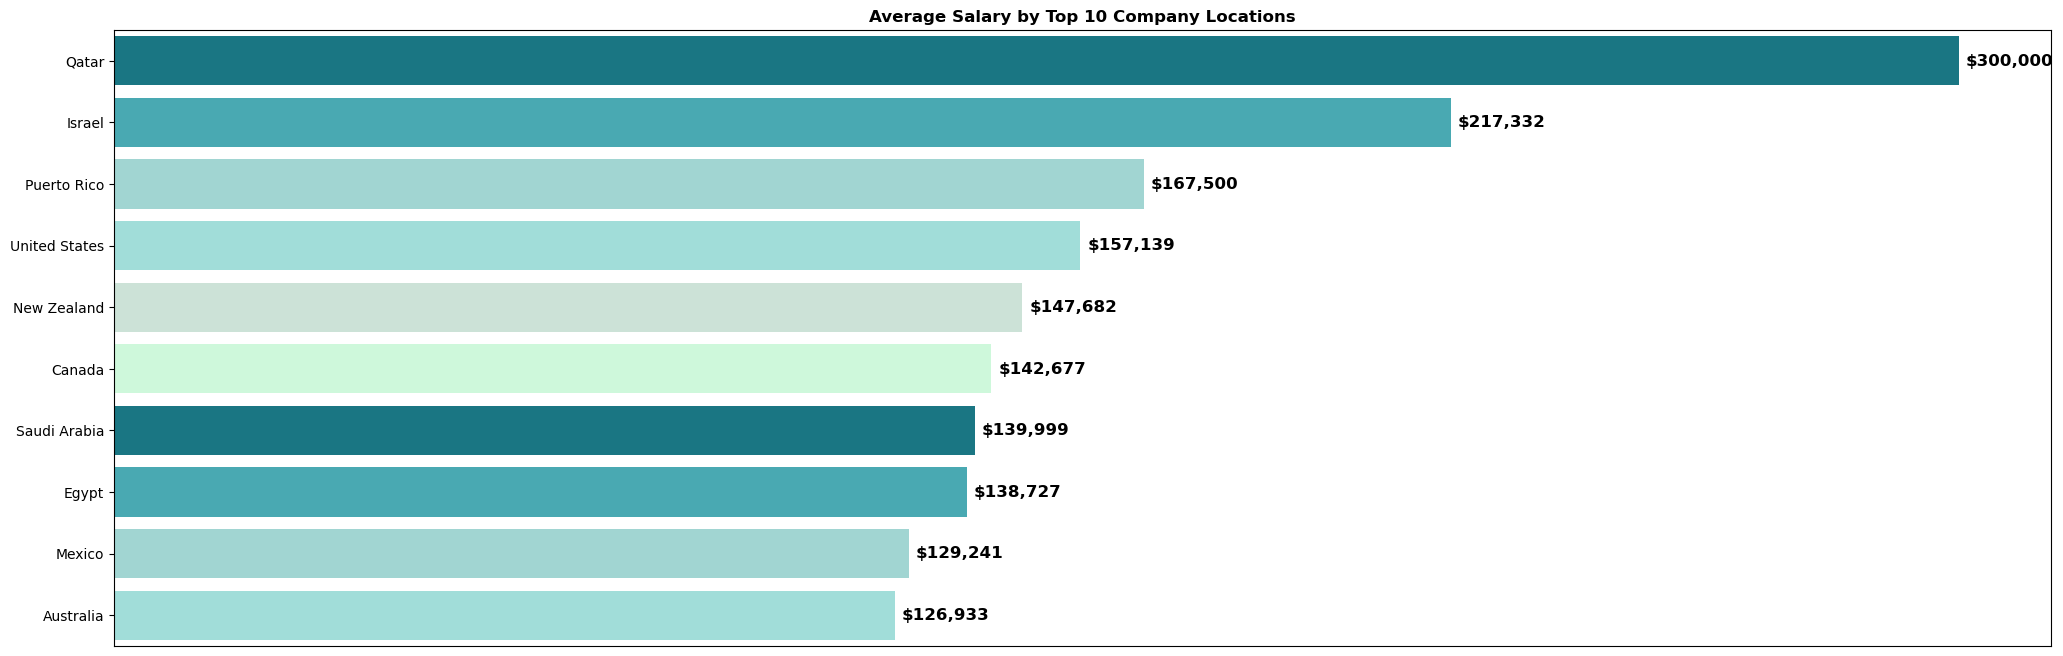

In [332]:
# Q3 -- What is the average salary across different company locations?
# Calculate average salary by company location
salary_location = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10).reset_index()

# Sort the values in descending order
salary_location = salary_location.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(25,8))
ax = sns.barplot(x='salary_in_usd', y='company_location', data=salary_location, palette=colorss)
ax.get_xaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Top 10 Company Locations',fontweight='bold')
plt.xlabel('Average Salary')
plt.ylabel('')
# Save the plot before showing
plt.savefig("11.jpeg", format='jpeg')
plt.show()

In [314]:
# Q3 -- What is the average salary across different company locations?
# Calculate average salary by company location
salary_location = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10).reset_index()

# Sort the values in descending order
salary_location = salary_location.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result
plt.figure(figsize=(25,8))
ax = sns.barplot(x='salary_in_usd', y='employee_residence', data=salary_location, palette=colorss)
ax.get_xaxis().set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points',fontweight='bold')

# Customizations
plt.title('Average Salary by Top 10 Employee Residence',fontweight='bold')
plt.xlabel('Average Salary')
plt.ylabel('')
# Save the plot before showing
plt.savefig("12.jpeg", format='jpeg')
plt.show()

In [318]:
# Calculate average salary for remote ratio
salary_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Sort the values in descending order
salary_remote = salary_remote.sort_values(by='salary_in_usd', ascending=False)

# Plotting the result as a pie chart
plt.figure(figsize=(10,6))

# Pie chart requires the values (size) and labels
plt.pie(salary_remote['salary_in_usd'], labels=salary_remote['remote_ratio'], autopct='%1.1f%%', 
        startangle=90, textprops={'fontweight': 'bold'},colors=sns.color_palette(colorss, len(salary_remote)))

# Customizations
plt.title('Average Salary Distribution by Remote Ratio',fontweight='bold')
# Save the plot before showing
plt.savefig("13.jpeg", format='jpeg')
plt.show()

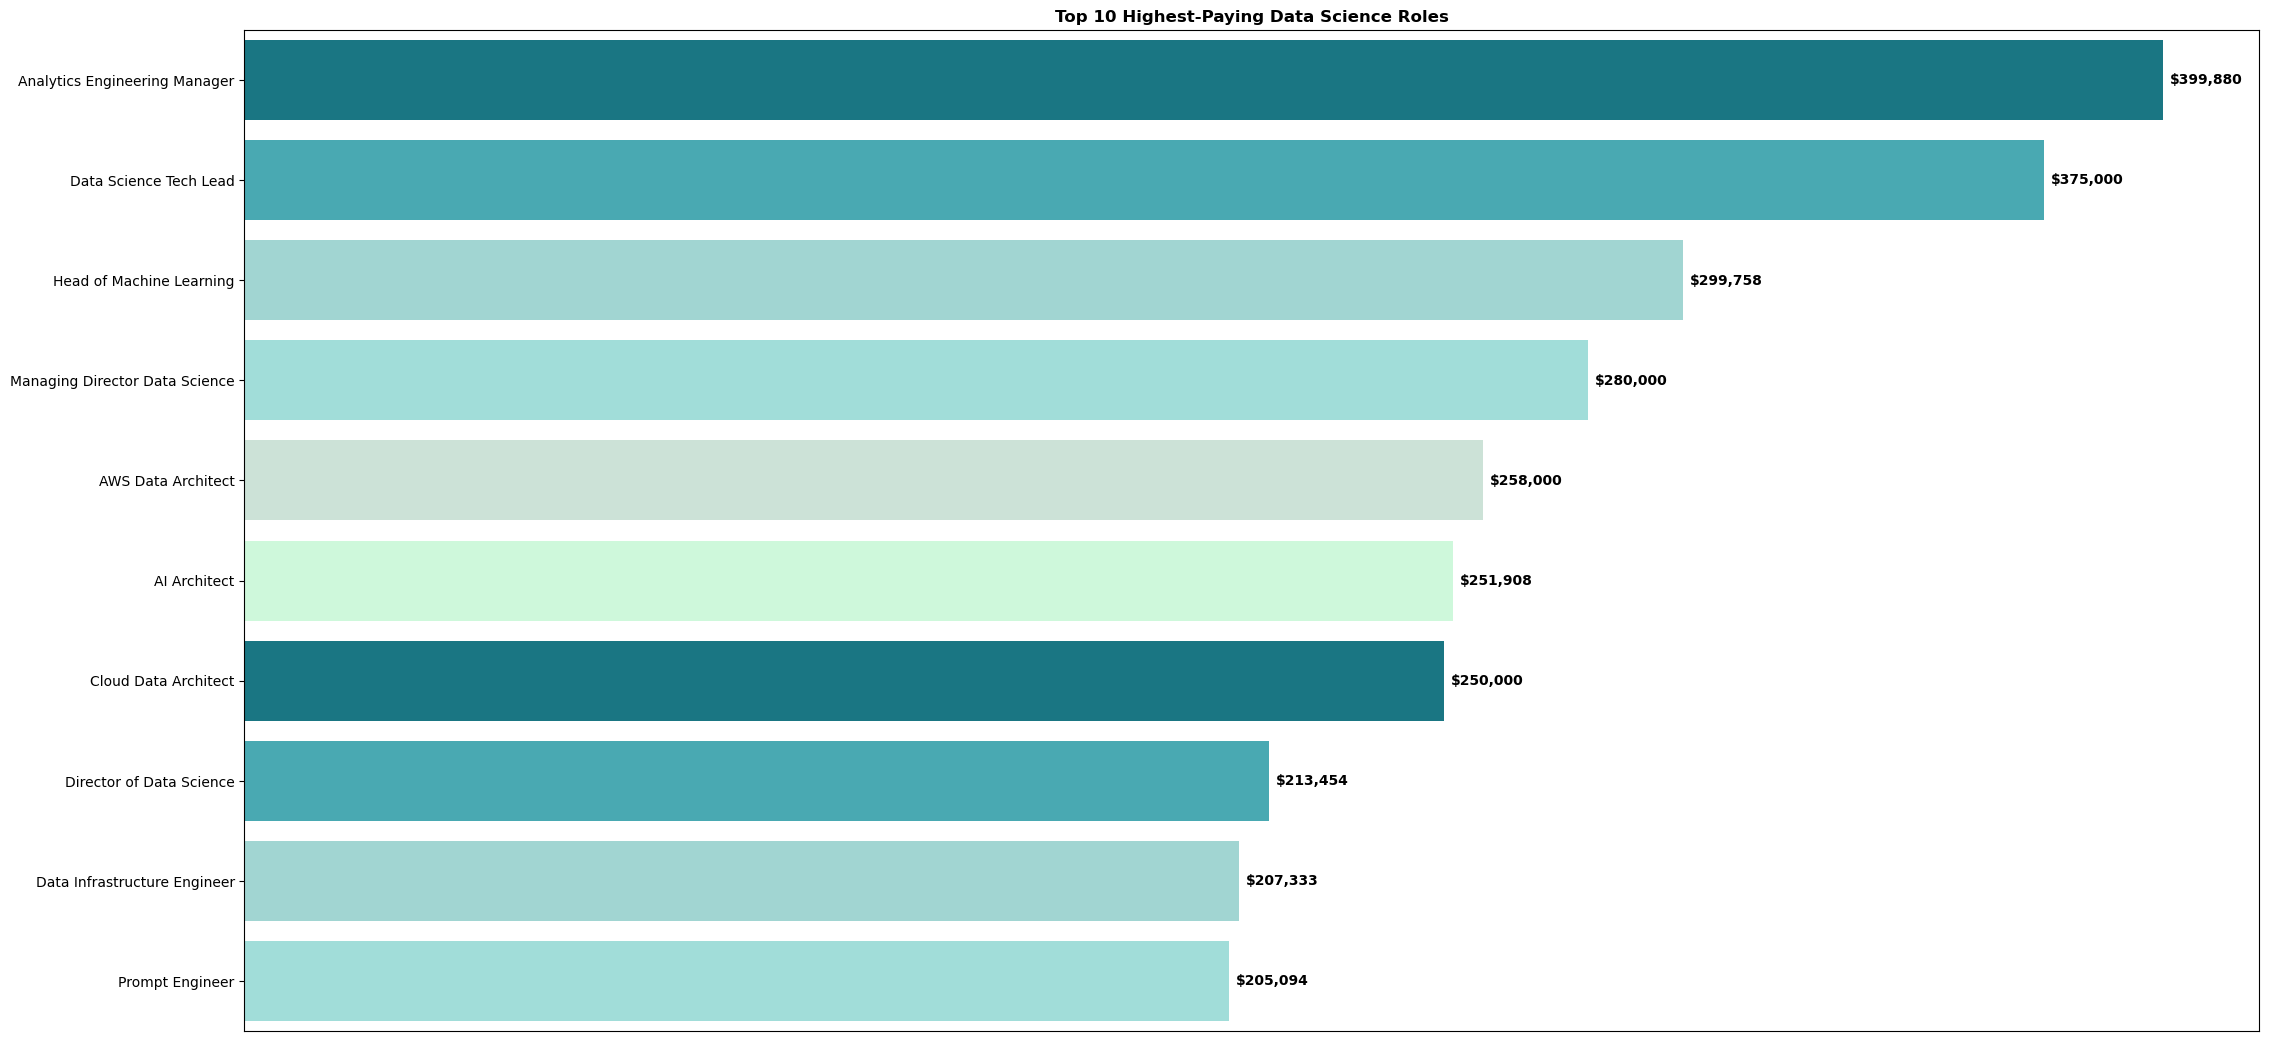

In [320]:
#Question 5 -- Which job roles have the highest-paying opportunities in data science?
# Find the average salary for each job title
high_salary_roles = df.groupby(['job_title'])['salary_in_usd'].mean().reset_index()
top_salaries = high_salary_roles.nlargest(10, 'salary_in_usd')  # Top 10 highest-paying roles

# Plot top roles with highest salaries
plt.figure(figsize=(26, 13))
ax = sns.barplot(data=top_salaries, y='job_title', x='salary_in_usd', dodge=False, palette=colorss)
ax.get_xaxis().set_visible(False)  # Hide the x-axis (Average Salary)
ax.set_ylabel('')  # Hide the y-axis label "Job Title"
plt.title('Top 10 Highest-Paying Data Science Roles',fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontweight='bold')
# Save the plot before showing
plt.savefig("14.jpeg", format='jpeg')
plt.show()

In [322]:
# Count the number of job listings per year
job_growth_per_year = df.groupby('work_year').size().reset_index(name='job_count')

# Sort the values by year to ensure the trend is displayed correctly
job_growth_per_year = job_growth_per_year.sort_values(by='work_year', ascending=True)

# Plotting the result
plt.figure(figsize=(18,6))
ax = sns.lineplot(x='work_year', y='job_count', data=job_growth_per_year, marker='o', palette='viridis')
ax.get_yaxis().set_visible(False)  # Hide the x-axis (Average Salary)

# Add data labels
for i in range(len(job_growth_per_year)):
    ax.text(job_growth_per_year['work_year'].iloc[i], job_growth_per_year['job_count'].iloc[i], 
            f'{job_growth_per_year["job_count"].iloc[i]:,}', fontsize=14, ha='center', va='bottom',fontweight='bold')

# Customizations
plt.title('Growth of Data Science Jobs Over the Years',fontweight='bold')
plt.xlabel('')
plt.ylabel('')  # Remove y-axis labels
plt.xticks(job_growth_per_year['work_year'], rotation=45)  # Ensure only years are shown

# Save the plot before showing
plt.savefig("15.jpeg", format='jpeg')
plt.show()

In [328]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
job_category          object
dtype: object

In [324]:
#Creating a heat map to show the correlation between different entities
sns.heatmap(df[['experience_level','job_title','employee_residence','salary_in_usd']].corr(),annot=True, cmap = 'coolwarm')
plt.show()

ValueError: could not convert string to float: 'Mid-Level'

# MACHINE LEARNING

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [57]:
data_science

work_year experience_level employment_type  \
0          2021        Mid-Level       Full-Time   
1          2021        Mid-Level       Full-Time   
2          2020        Mid-Level       Full-Time   
3          2021        Mid-Level       Full-Time   
4          2022     Senior-Level       Full-Time   
...         ...              ...             ...   
9119       2022        Mid-Level       Full-Time   
9120       2020     Expert-Level       Full-Time   
9121       2021      Entry-Level       Full-Time   
9122       2022      Entry-Level       Full-Time   
9123       2020      Entry-Level       Part-Time   

                            job_title  salary_in_usd employee_residence  \
0                      Data Scientist          40038              Chile   
1                     BI Data Analyst          36259            Hungary   
2                      Data Scientist          35735            Hungary   
3                         ML Engineer          77364              Japan   
4      Lead Machine Learning Engineer          95386              India   
...                               ...            ...                ...   
9119  Business Intelligence Developer          15000              Ghana   
9120               Staff Data Analyst          15000            Nigeria   
9121       Machine Learning Developer          15000           Thailand   
9122                     Data Analyst          15000          Indonesia   
9123                      ML Engineer          15966            Germany   

     remote_ratio company_location company_size           job_category  
0          Remote            Chile        Large           Data Science  
1          Hybrid    United States        Large  Business Intelligence  
2          Hybrid          Hungary        Large           Data Science  
3          Hybrid            Japan        Small                ML & AI  
4          Hybrid            India        Large                ML & AI  
...           ...              ...          ...                    ...  
9119       Remote            Ghana       Medium  Business Intelligence  
9120    In-Person           Canada       Medium           Data Analyst  
9121       Remote         Thailand        Large                ML & AI  
9122    In-Person        Indonesia        Large           Data Analyst  
9123       Remote          Germany        Small                ML & AI  

[9124 rows x 10 columns]

In [58]:
x = data_science.drop(['salary_in_usd','job_category','job_title'],axis =1 )
y = data_science['salary_in_usd']

In [59]:
x

work_year experience_level employment_type employee_residence  \
0          2021        Mid-Level       Full-Time              Chile   
1          2021        Mid-Level       Full-Time            Hungary   
2          2020        Mid-Level       Full-Time            Hungary   
3          2021        Mid-Level       Full-Time              Japan   
4          2022     Senior-Level       Full-Time              India   
...         ...              ...             ...                ...   
9119       2022        Mid-Level       Full-Time              Ghana   
9120       2020     Expert-Level       Full-Time            Nigeria   
9121       2021      Entry-Level       Full-Time           Thailand   
9122       2022      Entry-Level       Full-Time          Indonesia   
9123       2020      Entry-Level       Part-Time            Germany   

     remote_ratio company_location company_size  
0          Remote            Chile        Large  
1          Hybrid    United States        Large  
2          Hybrid          Hungary        Large  
3          Hybrid            Japan        Small  
4          Hybrid            India        Large  
...           ...              ...          ...  
9119       Remote            Ghana       Medium  
9120    In-Person           Canada       Medium  
9121       Remote         Thailand        Large  
9122    In-Person        Indonesia        Large  
9123       Remote          Germany        Small  

[9124 rows x 7 columns]

In [60]:
y

0       40038
1       36259
2       35735
3       77364
4       95386
        ...  
9119    15000
9120    15000
9121    15000
9122    15000
9123    15966
Name: salary_in_usd, Length: 9124, dtype: int64

In [61]:
# Identify categorical columns in X
label_encoder = LabelEncoder()

# Loop through each column in X and apply LabelEncoder if the data type is 'object' or 'category'
for column in x.select_dtypes(include=['object', 'category']).columns:
    x[column] = label_encoder.fit_transform(x[column])

In [62]:
x

work_year  experience_level  employment_type  employee_residence  \
0          2021                 2                2                  14   
1          2021                 2                2                  34   
2          2020                 2                2                  34   
3          2021                 2                2                  42   
4          2022                 3                2                  35   
...         ...               ...              ...                 ...   
9119       2022                 2                2                  30   
9120       2020                 1                2                  58   
9121       2021                 0                2                  78   
9122       2022                 0                2                  36   
9123       2020                 0                3                  29   

      remote_ratio  company_location  company_size  
0                2                13             0  
1                0                75             0  
2                0                30             0  
3                0                38             2  
4                0                31             0  
...            ...               ...           ...  
9119             2                25             1  
9120             1                11             1  
9121             2                70             0  
9122             1                32             0  
9123             2                24             2  

[9124 rows x 7 columns]

In [63]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the scaler for features
scaler = StandardScaler()

# Fit the scaler to the training data and transform the features
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Initialize the scaler for the target variable (if you need to scale it)
scaler_y = StandardScaler()

# Fit and transform the training target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test target variable
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [65]:
y_test_scaled

array([[ 0.29866924],
       [-0.07440574],
       [ 0.29176044],
       ...,
       [ 0.84722763],
       [ 0.06377018],
       [-0.95458633]])

In [66]:
#Instantiate the linear regression model
lr = LinearRegression()

In [67]:
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [68]:
lr.predict(x_test_scaled)

array([[ 0.21792019],
       [ 0.32994213],
       [-0.34962658],
       ...,
       [-0.3806811 ],
       [ 0.06408944],
       [-0.78126331]])

In [69]:
y_pred = lr.predict(x_test_scaled)

In [70]:
y_pred

array([[ 0.21792019],
       [ 0.32994213],
       [-0.34962658],
       ...,
       [-0.3806811 ],
       [ 0.06408944],
       [-0.78126331]])

In [71]:
#checking the error that exist between predicted values and actual values
mse = mean_squared_error(y_test_scaled,y_pred)

In [72]:
mse

1.0375155909043283

In [73]:
r2 = r2_score(y_test_scaled,y_pred)

In [74]:
r2

0.09353649957170218

In [75]:
# Fit and transform the training target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test target variable
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Initialize and train the model (for example, a Linear Regression model)
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

# Make predictions on the scaled test data
y_pred_scaled = model.predict(x_test_scaled)

# Inverse transform the scaled predictions and y_test to get the original values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)


# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Actual Values (y_test)': y_test_original.flatten(),
    'Predicted Values (y_pred)': y_pred.flatten()
})

# Display the DataFrame
results_df

Actual Values (y_test)  Predicted Values (y_pred)
0                   168000.0              162156.069476
1                   141000.0              170263.266151
2                   167500.0              121081.851247
3                   163800.0              162156.069476
4                    58400.0              117973.603946
...                      ...                        ...
1820                122500.0              152751.924467
1821                340000.0              140322.012027
1822                207700.0              118834.388801
1823                151000.0              151023.105371
1824                 77300.0               89843.648788

[1825 rows x 2 columns]

In [76]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(x_train_scaled, y_train_scaled.ravel())  # Use .ravel() to flatten the target

# Make predictions
y_pred_scaled = model.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Inverse transform the predictions and the test target values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)


# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    'Actual Values (y_test)': y_test_scaled.flatten(),
    'Predicted Values (y_pred)': y_pred.flatten()
})

# Display the results
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Display the first few rows of actual vs predicted values
print("\nActual vs Predicted Values:")
print(results_df.head())

Model Evaluation:
Mean Squared Error (MSE): 0.9347301752762796
R-squared (R²): 0.1833387429885629

Actual vs Predicted Values:
   Actual Values (y_test)  Predicted Values (y_pred)
0                0.298669              172966.082181
1               -0.074406              168000.181710
2                0.291760              190106.506882
3                0.240635              172966.082181
4               -1.215739               86935.191865


In [80]:
# Define the p-value threshold (e.g., 0.05)
p_value_threshold = 0.05

# Get the indices of features that have p-values below the threshold
selected_features = np.where(p_values < p_value_threshold)[0]

# Transform X to include only the selected features using iloc for indexing by position
x_selected = x.iloc[:, selected_features]

# Display the selected features and their p-values
for feature_idx in selected_features:
    print(f"Feature {feature_idx} - p-value: {p_values[feature_idx]}")

NameError: name 'p_values' is not defined

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Example for selecting top features using ANOVA F-test for classification
selector = SelectKBest(score_func=f_classif, k=5)
x_selected = selector.fit_transform(x, y)

# Check the scores of each feature
feature_scores = selector.scores_

In [ ]:
# Display the F-scores of each feature
for i, score in enumerate(feature_scores):
    print(f"Feature {i}: {score}")